   value
0  100.0
1   88.0
2   97.7
3  102.6
4  106.7


<Axes: >

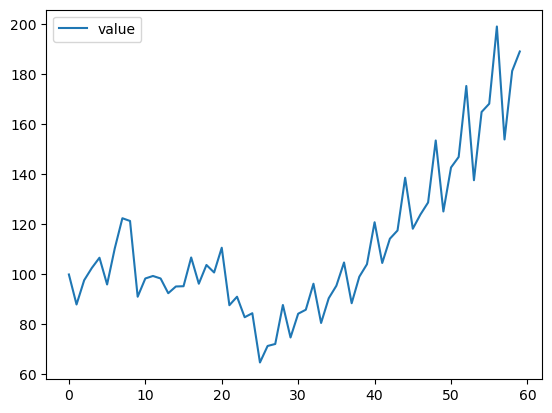

In [1]:
# прогноз полных данных при помощи авто аримы
# видно, что не стационарный и с сезонным лагом = 4, следовательно p = 4
import pandas as pd
df = pd.read_csv('sample_full.csv', names=['value'], header=0)
print(df.head())
df.plot()

C:\Users\crisc\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


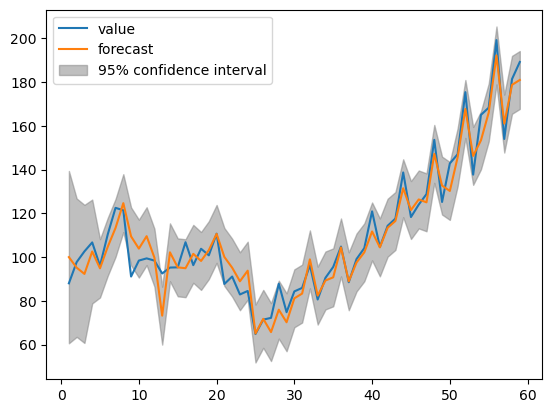

In [14]:
from statsmodels.graphics.tsaplots import plot_predict

model_fit = ARIMA(df, order=(4,1,1)).fit()
fig, ax = plt.subplots()
ax = df.loc[1:].plot(ax=ax)
plot_predict(model_fit, 1, 59, ax=ax)
plt.show()

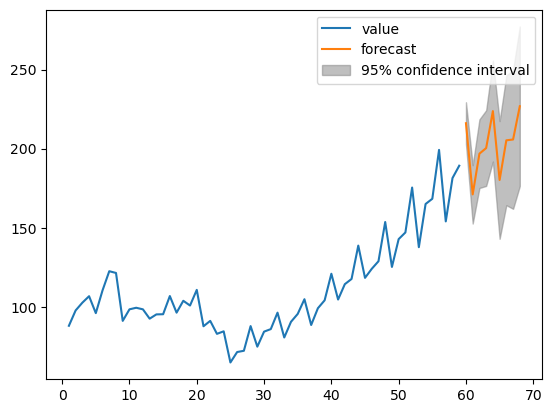

In [15]:
fig, ax = plt.subplots()
ax = df.loc[1:].plot(ax=ax)
plot_predict(model_fit, 60, 68, ax=ax)
plt.show()

In [16]:
df['fit'] = model_fit.predict()
df

,value,fit
0,100.0,0.000000
1,88.0,99.975938
2,97.7,95.148894
3,102.6,92.299327
4,106.7,102.544755
5,96.0,94.856571
6,110.4,104.710469
7,122.5,113.326468
8,121.4,124.655174
9,91.1,109.445125


In [18]:
prediction = model_fit.predict(60, 68)
print(prediction)

60    216.080339
61    171.081189
62    196.812014
63    200.346441
64    223.732914
65    180.197889
66    205.261082
67    205.773093
68    226.801874
Name: predicted_mean, dtype: float64


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   60 non-null     float64
 1   fit     60 non-null     float64
dtypes: float64(2)
memory usage: 3.5 KB


In [20]:
# оценка подобранной модели
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from pmdarima.metrics import smape

mae = mean_absolute_error(df['value'], df['fit'])
mape = mean_absolute_percentage_error(df['value'], df['fit'])
rmse = np.sqrt(mean_squared_error(df['value'], df['fit']))

print(f'mae: {mae}')
print(f'mape: {mape}')
print(f'rmse: {rmse}')
print(f"Mean squared error: {mean_squared_error(df['value'], df['fit'])}")
print(f"SMAPE: {smape(df['value'], df['fit'])}")

mae: 7.024825760627039
mape: 0.06668462584416847
rmse: 14.676293854466218
Mean squared error: 215.39360130264288
SMAPE: 8.359554695986358


In [21]:
# автоподбор параметров
import pmdarima as pm
auto_arima = pm.auto_arima(df['value'], stepwise=False, seasonal=False)
auto_arima

ARIMA(order=(3, 2, 1), scoring_args={}, suppress_warnings=True)

In [22]:
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   60
Model:               SARIMAX(3, 2, 1)   Log Likelihood                -199.150
Date:                Thu, 20 Apr 2023   AIC                            410.300
Time:                        22:42:38   BIC                            422.663
Sample:                             0   HQIC                           415.116
                                 - 60                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2733      1.165      0.235      0.814      -2.010       2.557
ar.L1         -1.0132      0.083    -12.259      0.000      -1.175      -0.851
ar.L2         -0.9718      0.109     -8.945      0.000      -1.185      -0.759
ar.L3         -0.9482      0.048    -19.931      0.000      -1.041      -0.855
ma.L1          0.0803      0.222      0.362      0.717      -0.354       0.515
sigma2        49.1014      7.729      6.353      0.000      33.952      64.251
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 4.72
Prob(Q):                              0.96   Prob(JB):                         0.09
Heteroskedasticity (H):               0.51   Skew:                             0.08
Prob(H) (two-sided):                  0.15   Kurtosis:                         4.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
# автоподбор параметров для SARIMAX
import pmdarima as pm
auto_arima = pm.auto_arima(df['value'], stepwise=False, seasonal=True, m = 4)
auto_arima

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(2, 1, 1, 4),
      suppress_warnings=True, with_intercept=False)

In [24]:
# AIC & BIC меньше подобранной выше модели
auto_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   60
Model:             SARIMAX(0, 1, 0)x(2, 1, [1], 4)   Log Likelihood                -181.695
Date:                             Thu, 20 Apr 2023   AIC                            371.390
Time:                                     22:42:51   BIC                            379.419
Sample:                                          0   HQIC                           374.495
                                              - 60                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L4       -0.7825      0.269     -2.914      0.004      -1.309      -0.256
ar.S.L8       -0.4231      0.130     -3.252      0.001      -0.678      -0.168
ma.S.L4        0.5602      0.302      1.853      0.064      -0.032       1.153
sigma2        42.0970      8.311      5.065      0.000      25.808      58.386
===================================================================================
Ljung-Box (L1) (Q):                   0.38   Jarque-Bera (JB):                 0.97
Prob(Q):                              0.54   Prob(JB):                         0.62
Heteroskedasticity (H):               0.75   Skew:                            -0.05
Prob(H) (two-sided):                  0.55   Kurtosis:                         3.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
# по метрикам ошибок, после отсечения данных результаты лучше